# Asynchronous Lecture 05

## Atrificial neural networks

### CIS432 Machine Learning for Business Analytics




# Class exercise 2: continuous optimization in 1-dimension


1. Plot the function $f(x) = x^2 + 7x + 3$ in the range (-100,100)
2. Which value of $x$  minimizes $f$? zoom-in on the interval (-9,2)
3. Apply gradient descent to optimize the function $f(x)$ (that is, to find the value of $x$ where the function $f(x)$ is minimal). Set the starting point to x0=0, the learning rate to 0.01, and the number of epochs to 8.

The gradient/slope $f'(x)$ at a point $x$ can be approximated using the expression $f'(x)=\frac{f(x+\epsilon)-f(x)}{\epsilon}$ implemented below.

In [ ]:
eps = 0.0001
def f_prime(f_, x_):
    # Approximates the gradient of the 1-dimensional function f_ at x_
    #
    # Input:
    #   f_ - 1D function
    #   x_ - scalar
    #
    # Output: the slope/gradient of f_ at x_
    #
    return((f_(x_+eps)-f_(x_))/eps )

def gradient_descent(f_, x0, n_epochs, learning_rate):
    # Applies the gradient descent algorithm on a 1D function (in practice, these would be computed analytically using built in functions)
    #
    # Input:
    #   f_ - 1D function
    #   x0 - starting point
    #   n_epochs - number of iterations the algorithm is executed
    #   learning rate - the learning rate/step size of the algorithm
    #
    # Output:
    #  trajectory - the values of x reached throughout the execution of the algorithm
    #
    trajectory = [x0]
    for i in range(n_epochs):
        x_prev = trajectory[-1]
        x_next = x_prev - learning_rate*f_prime(f_, x_prev)
        trajectory.append(x_next)
    return(trajectory)

4. Plot the trajectory of the GD algorithm (that is, the points visited by the algorithm). Did the algorithm converge?
5. Apply the GD algorithm again, this time with the learning rate equal to 0.1. Did the algorithm converge?
6. Apply the GD algorithm again, this time with the learning rate equal to 1. Did the algorithm converge?
7. Apply the GD algorithm again, this time with the learning rate equal to 0.01. How many iterations should the algorithm run until reaching the optimal value?
8. Apply GD on the function $g=x^4+6x^3+3x^2-26x-24$, with learning rate 0.01, starting point $x_0=0$, for 8 iterations. Plot the function and the trajectory of the algorithm.
9. Did the algorithm converge? would it converge if the number of iterations increases? would the algorithm reach the optimal solution if the number of iteration is increased?

___
Solution to 1

___
Solution to 2

___
Solution to 3

___
Solution to 4

___
Solution to 5

___
Solution to 6

___
Solution to 7

___
Solution to 8

___
Solution to 9

# Solution to class exercise 2

1. Plot the function $f(x) = x^2 + 7x + 3$ in the range (-100,100)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

In [ ]:
def f(x):
    return x**2 + 7*x + 3

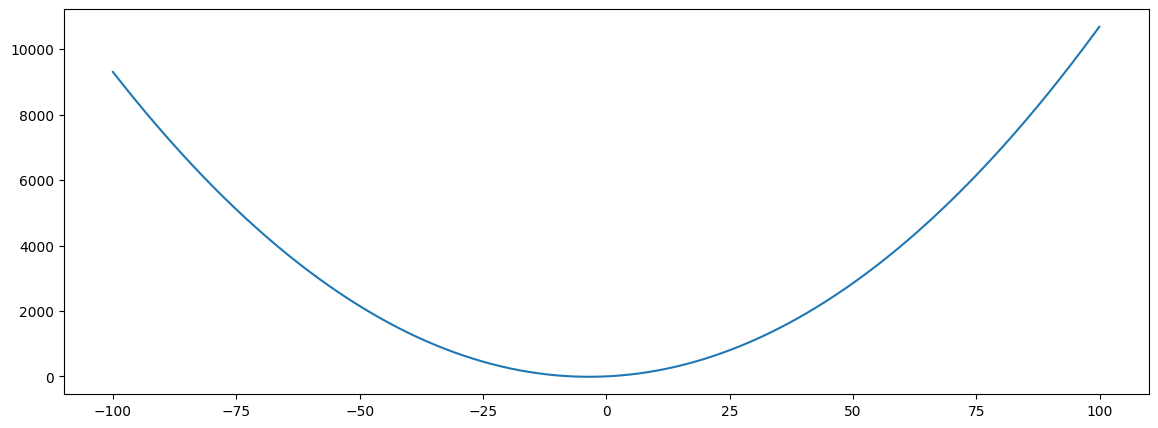

In [ ]:
x = np.arange(-100,100,0.1)
y = np.apply_along_axis(f, axis=0, arr=x)
plt.plot(x, y); # plot f(x) for x in (-100,100)

2. Which value of $x$  minimizes $f$? zoom-in on the interval (-9,2)


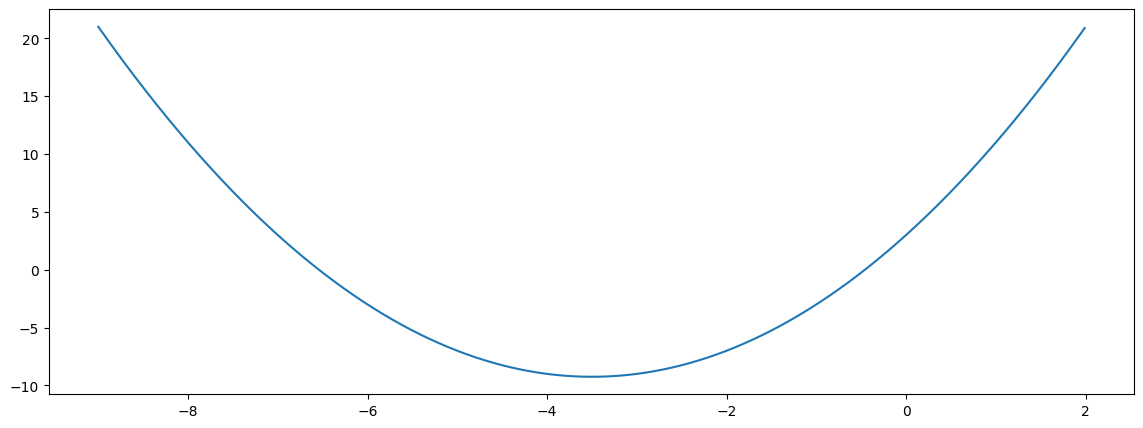

In [ ]:
x = np.arange(-9,2,0.01)
y = np.apply_along_axis(f, axis=0, arr=x)
plt.plot(x, y);

3. Apply gradient descent to optimize the function $f(x)$ (that is, to find the value of $x$ where the function $f(x)$ is minimal). Set the starting point to x0=0, the learning rate to 0.01, and the number of epochs to 8.

The gradient/slope $f'(x)$ at a point $x$ can be approximated using the expression $f'(x)=\frac{f(x+\epsilon)-f(x)}{\epsilon}$ implemented below.

In [ ]:
eps = 0.0001
def f_prime(f_, x_):
    # Approximates the gradient of the 1-dimensional function f_ at x_
    #
    # Input:
    #   f_ - 1D function
    #   x_ - a scalar
    #
    # Output: the slope/gradient of f_ at x_
    #
    return((f_(x_+eps)-f_(x_))/eps )

def gradient_descent(f_, x0, n_epochs, learning_rate):
    # Applies the gradient descent algorithm on a 1D function
    #
    # Input:
    #   f_ - 1D function
    #   x0 - starting point
    #   n_epochs - number of iterations the algorithm is executed
    #   learning rate - the learning rate/step size of the algorithm
    #
    # Output:
    #  trajectory - the values of x reached throughout the execution of the algorithm
    #
    trajectory = [x0]
    for i in range(n_epochs):
        x_prev = trajectory[-1]
        x_next = x_prev - learning_rate*f_prime(f_, x_prev)
        trajectory.append(x_next)
    return(trajectory)

In [ ]:
trajectory =  gradient_descent(f, 0, 8, 0.01)
trajectory

[0,
 -0.07000100000000842,
 -0.13860197999999713,
 -0.20583094039996475,
 -0.27171532159195877,
 -0.33628201516011647,
 -0.399557374856907,
 -0.4615672273598159,
 -0.5223368828126462]

4. Plot the trajectory of the GD algorithm (that is, the points visited by the algorithm). Did the algorithm converge?


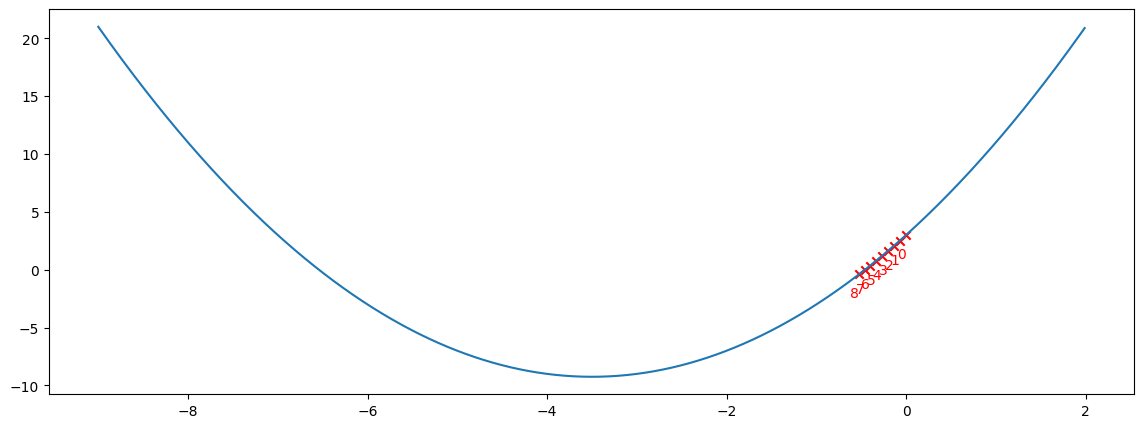

In [ ]:
plt.plot(x, y)
plt.scatter(trajectory, list(map(f,trajectory)), marker='x', color='r')
for i in range(len(trajectory)):
    plt.text(trajectory[i]-0.1, f(trajectory[i])-2, str(i), color='r')

5. Apply the GD algorithm again, this time with the learning rate equal to 0.1. Did the algorithm converge?

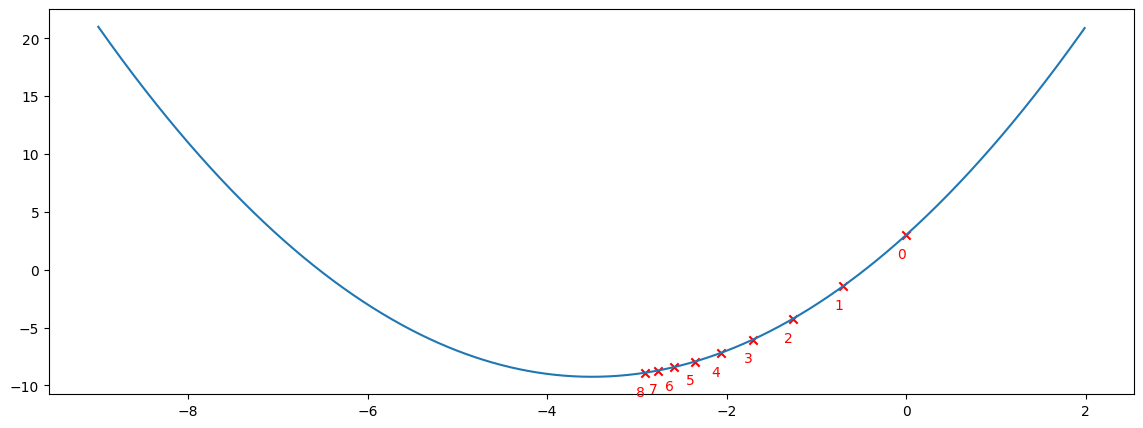

In [ ]:
trajectory =  gradient_descent(f, 0, 8, 0.1)
plt.plot(x, y)
plt.scatter(trajectory, list(map(f,trajectory)), marker='x', color='r')
for i in range(len(trajectory)):
    plt.text(trajectory[i]-0.1, f(trajectory[i])-2, str(i), color='r')

6. Apply the GD algorithm again, this time with the learning rate equal to 1. Did the algorithm converge?

[0, -7.000100000000842, 2.6645352591003757e-11, -7.000100000027487, 7.105427357601002e-11, -7.000100000071896, 9.769962616701378e-11, -7.000100000098541, 1.4210854715202004e-10]


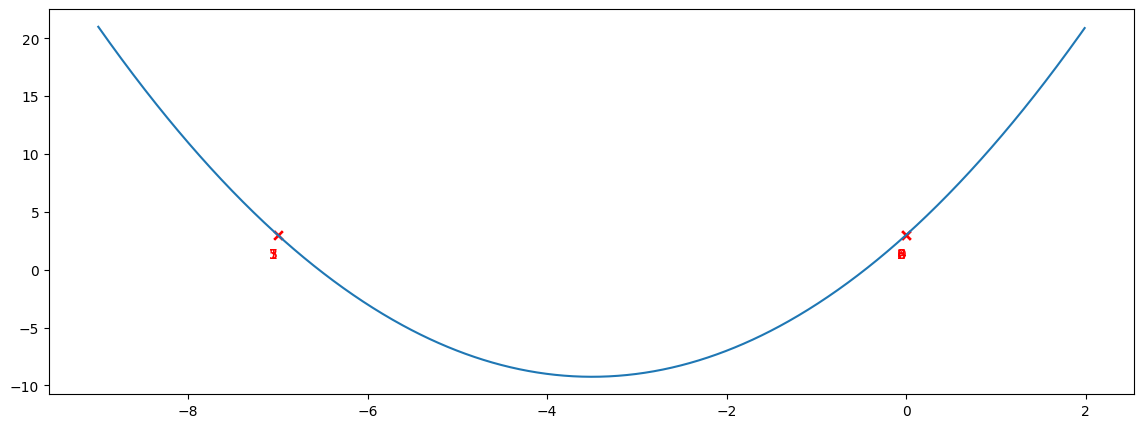

In [ ]:
trajectory =  gradient_descent(f, 0, 8, 1)
print(trajectory)
plt.plot(x, y)
plt.scatter(trajectory, list(map(f,trajectory)), marker='x', color='r')
for i in range(len(trajectory)):
    plt.text(trajectory[i]-0.1, f(trajectory[i])-2, str(i), color='r')

7. Apply the GD algorithm again, this time with the learning rate equal to 0.01. How many iterations should the algorithm run until reaching the optimal value?


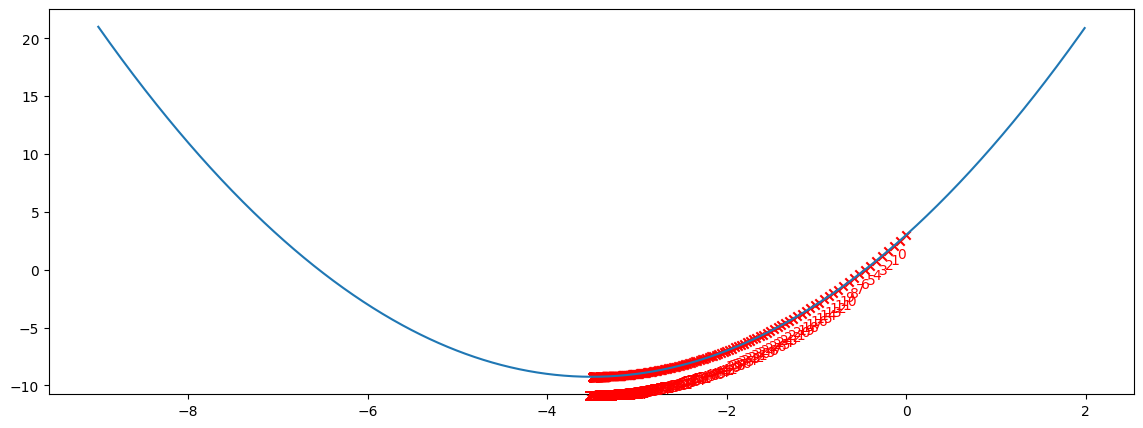

In [ ]:
trajectory =  gradient_descent(f, 0, 300, 0.01)
plt.plot(x, y)
plt.scatter(trajectory, list(map(f,trajectory)), marker='x', color='r')
for i in range(len(trajectory)):
    plt.text(trajectory[i]-0.1, f(trajectory[i])-2, str(i), color='r')

8. Apply GD on the function $g=x^4+6x^3+3x^2-26x-24$, with learning rate 0.01, starting point $x_0=0$, for 8 iterations. Plot the function and the trajectory of the algorithm.

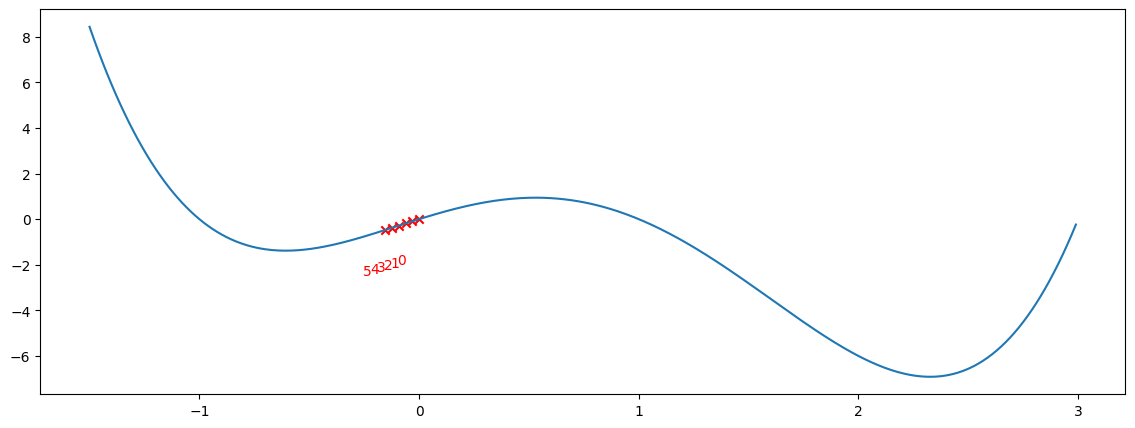

In [ ]:
def g(x):
    return (x-1)*(x)*(x+1)*(x-3)

x = np.arange(-1.5,3,0.01)
y = np.array(list(map(g, x)))

trajectory =  gradient_descent(g, 0, 5, 0.01)
plt.plot(x, y)
plt.scatter(trajectory, list(map(g,trajectory)), marker='x', color='r')
for i in range(len(trajectory)):
    plt.text(trajectory[i]-0.1, g(trajectory[i])-2, str(i), color='r')

9. Did the algorithm converge? would it converge if the number of iterations increases? would the algorithm reach the optimal solution if the number of iteration is increased?